# Project ID  :  "PTID-CDS-JUN-23-1562"

# PRCP-1027-Skin Disorder

## Problem Statement

Task 1:-Prepare a complete data analysis report on the given data.

Task 2:-Create a predictive model  using machine learning techniques to predict the various classes of skin disease. 

Task3:-Suggestions to the Doctors to identify the skin diseases of the patient at the earliest. 


# Objectives
The objective of this project is to develop a predictive model for accurately diagnosing "erythemato-squamous" diseases based on clinical and histopathological features. These diseases, including psoriasis, seborrheic dermatitis, lichen planus, pityriasis rosea, chronic dermatitis, and pityriasis rubra pilaris, present similar clinical symptoms of erythema and scaling, making their differential diagnosis challenging. By leveraging machine learning techniques, we aim to create a model that can differentiate between these diseases based on the provided features.

# Task 1

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [6]:
data = pd.read_csv('dataset_35_dermatology (1).csv')
data

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,family_history,melanin_incontinence,eosinophils_in_the_infiltrate,PNL_infiltrate,fibrosis_of_the_papillary_dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing_of_the_rete_ridges,elongation_of_the_rete_ridges,thinning_of_the_suprapapillary_epidermis,spongiform_pustule,munro_microabcess,focal_hypergranulosis,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
0,2,2,0,3,0,0,0,0,1,0,0,0,0,0,0,3,2,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,1,0,0,1,0,1,2,0,2,2,2,2,2,1,0,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,0,1,0,0,0,1,2,0,2,0,0,0,0,0,2,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,0,0,0,3,0,0,2,0,3,2,2,2,2,0,0,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,0,1,0,0,0,1,2,0,0,0,0,0,0,0,2,2,3,2,3,0,0,2,3,45,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2,1,1,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,0,25,4
362,3,2,1,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0,0,1,0,1,0,0,0,2,0,36,4
363,3,2,2,2,3,2,0,2,0,0,0,2,2,0,0,3,3,0,0,0,0,0,0,0,3,0,3,0,3,0,0,2,3,28,3
364,2,1,3,1,2,3,0,2,0,0,0,2,0,0,0,3,2,0,0,0,0,0,0,0,3,0,2,0,1,0,0,2,3,50,3


In [7]:
pd.set_option('display.max_columns', None)
data

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,family_history,melanin_incontinence,eosinophils_in_the_infiltrate,PNL_infiltrate,fibrosis_of_the_papillary_dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing_of_the_rete_ridges,elongation_of_the_rete_ridges,thinning_of_the_suprapapillary_epidermis,spongiform_pustule,munro_microabcess,focal_hypergranulosis,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
0,2,2,0,3,0,0,0,0,1,0,0,0,0,0,0,3,2,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,1,0,0,1,0,1,2,0,2,2,2,2,2,1,0,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,0,1,0,0,0,1,2,0,2,0,0,0,0,0,2,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,0,0,0,3,0,0,2,0,3,2,2,2,2,0,0,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,0,1,0,0,0,1,2,0,0,0,0,0,0,0,2,2,3,2,3,0,0,2,3,45,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2,1,1,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,0,25,4
362,3,2,1,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0,0,1,0,1,0,0,0,2,0,36,4
363,3,2,2,2,3,2,0,2,0,0,0,2,2,0,0,3,3,0,0,0,0,0,0,0,3,0,3,0,3,0,0,2,3,28,3
364,2,1,3,1,2,3,0,2,0,0,0,2,0,0,0,3,2,0,0,0,0,0,0,0,3,0,2,0,1,0,0,2,3,50,3


Dataset: The dataset used for this project consists of clinical and histopathological data from patients with "erythemato-squamous" diseases. The dataset includes 12 clinical features and 22 histopathological features. The clinical features represent observations made during the clinical evaluation, while the histopathological features are determined through microscopic analysis of skin samples.

Feature Value Information: In this dataset, the family history feature is encoded as 1 if any of the diseases in the "erythemato-squamous" group has been observed in the family and 0 otherwise. The age feature represents the age of the patient. The remaining features, both clinical and histopathological, are assigned values on a scale of 0 to 3. A value of 0 indicates the absence of the feature, while a value of 3 represents the highest degree or largest amount of the feature. Intermediate values of 1 and 2 indicate relative intermediate levels of the feature. The dataset aims to assist in the differential diagnosis of these diseases by utilizing both clinical and histopathological information. By training a machine learning model on this dataset, we aim to improve the accuracy and efficiency of diagnosing "erythemato-squamous" diseases, reducing the need for invasive procedures like biopsies.

Attribute Information:
Clinical Attributes: (take values 0, 1, 2, 3, unless otherwise indicated)
1: erythema
2: scaling
3: definite borders
4: itching
5: koebner phenomenon
6: polygonal papules
7: follicular papules
8: oral mucosal involvement
9: knee and elbow involvement
10: scalp involvement
11: family history, (0 or 1)
Histopathological Attributes: (take values 0, 1, 2, 3)
12: melanin incontinence
13: eosinophils in the infiltrate
14: PNL infiltrate
15: fibrosis of the papillary dermis
16: exocytosis
17: acanthosis
18: hyperkeratosis
19: parakeratosis
20: clubbing of the rete ridges
21: elongation of the rete ridges
22: thinning of the suprapapillary epidermis
23: spongiform pustule
24: munro microabcess
25: focal hypergranulosis
26: disappearance of the granular layer
27: vacuolisation and damage of basal layer
28: spongiosis
29: saw-tooth appearance of retes
30: follicular horn plug
31: perifollicular parakeratosis
32: inflammatory monoluclear inflitrate
33: band-like infiltrate
34: Age (linear)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   erythema                                  366 non-null    int64 
 1   scaling                                   366 non-null    int64 
 2   definite_borders                          366 non-null    int64 
 3   itching                                   366 non-null    int64 
 4   koebner_phenomenon                        366 non-null    int64 
 5   polygonal_papules                         366 non-null    int64 
 6   follicular_papules                        366 non-null    int64 
 7   oral_mucosal_involvement                  366 non-null    int64 
 8   knee_and_elbow_involvement                366 non-null    int64 
 9   scalp_involvement                         366 non-null    int64 
 10  family_history                            366 non-

In [9]:
data.head(40)

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,family_history,melanin_incontinence,eosinophils_in_the_infiltrate,PNL_infiltrate,fibrosis_of_the_papillary_dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing_of_the_rete_ridges,elongation_of_the_rete_ridges,thinning_of_the_suprapapillary_epidermis,spongiform_pustule,munro_microabcess,focal_hypergranulosis,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
0,2,2,0,3,0,0,0,0,1,0,0,0,0,0,0,3,2,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,1,0,0,1,0,1,2,0,2,2,2,2,2,1,0,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,0,1,0,0,0,1,2,0,2,0,0,0,0,0,2,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,0,0,0,3,0,0,2,0,3,2,2,2,2,0,0,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,0,1,0,0,0,1,2,0,0,0,0,0,0,0,2,2,3,2,3,0,0,2,3,45,3
5,2,3,2,0,0,0,0,0,0,0,0,0,2,1,0,2,2,0,2,0,0,0,1,0,0,0,0,2,0,0,0,1,0,41,2
6,2,1,0,2,0,0,0,0,0,0,0,0,0,0,3,1,3,0,0,0,2,0,0,0,0,0,0,0,0,0,0,2,0,18,5
7,2,2,3,3,3,3,0,2,0,0,0,2,0,0,0,2,3,0,0,0,0,0,0,0,0,2,2,3,2,0,0,3,3,57,3
8,2,2,1,0,2,0,0,0,0,0,0,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,0,2,0,0,0,2,0,22,4
9,2,2,1,0,1,0,0,0,0,0,0,0,0,0,0,3,2,0,2,0,0,0,0,0,0,0,0,2,0,0,0,2,0,30,4


# Exploratory Data Analysis

In [41]:
data.isnull().sum()

erythema                                    0
scaling                                     0
definite_borders                            0
itching                                     0
koebner_phenomenon                          0
polygonal_papules                           0
follicular_papules                          0
oral_mucosal_involvement                    0
knee_and_elbow_involvement                  0
scalp_involvement                           0
family_history                              0
melanin_incontinence                        0
eosinophils_in_the_infiltrate               0
PNL_infiltrate                              0
fibrosis_of_the_papillary_dermis            0
exocytosis                                  0
acanthosis                                  0
hyperkeratosis                              0
parakeratosis                               0
clubbing_of_the_rete_ridges                 0
elongation_of_the_rete_ridges               0
thinning_of_the_suprapapillary_epi

there are no null values in each feature. For "age" column, it is in the object form. Will have to be converted to integer. There are '?' values in 'Age' column too. 

In [42]:
age = data[data['Age'] == '?']
age

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,family_history,melanin_incontinence,eosinophils_in_the_infiltrate,PNL_infiltrate,fibrosis_of_the_papillary_dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing_of_the_rete_ridges,elongation_of_the_rete_ridges,thinning_of_the_suprapapillary_epidermis,spongiform_pustule,munro_microabcess,focal_hypergranulosis,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class


In [43]:
data['Age'] = data['Age'].replace('?', np.nan) #replacing the ? values with nan value

In [44]:
data.dropna(subset=['Age'], inplace=True) #dropping the nan values

In [45]:
data['Age'] = data['Age'].astype(float).astype(pd.Int64Dtype())  #converting object to float then to integer

In [46]:
data.describe()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,family_history,melanin_incontinence,eosinophils_in_the_infiltrate,PNL_infiltrate,fibrosis_of_the_papillary_dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing_of_the_rete_ridges,elongation_of_the_rete_ridges,thinning_of_the_suprapapillary_epidermis,spongiform_pustule,munro_microabcess,focal_hypergranulosis,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
count,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000
mean,2.078212,1.807263,1.569832,1.354749,0.636872,0.449721,0.170391,0.379888,0.622905,0.530726,0.122905,0.410615,0.142458,0.547486,0.315642,1.368715,1.955307,0.511173,1.287709,0.662011,0.983240,0.642458,0.298883,0.368715,0.399441,0.474860,0.460894,0.949721,0.458101,0.106145,0.117318,1.877095,0.558659,36.296089,2.782123
std,0.664865,0.701541,0.900909,1.135062,0.908709,0.956468,0.576394,0.837388,0.990278,0.912352,0.328788,0.877097,0.415844,0.814251,0.828979,1.111853,0.700710,0.754919,0.921827,1.061292,1.159421,1.040139,0.675750,0.765740,0.856479,0.871705,0.959914,1.129060,0.959796,0.455180,0.493863,0.699324,1.107990,15.324557,1.593936
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,25.000000,1.000000
50%,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,35.000000,3.000000
75%,2.750000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.750000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,49.750000,4.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,75.000000,6.000000


In [47]:
# Univariate analysis (checking distributions of each feature)

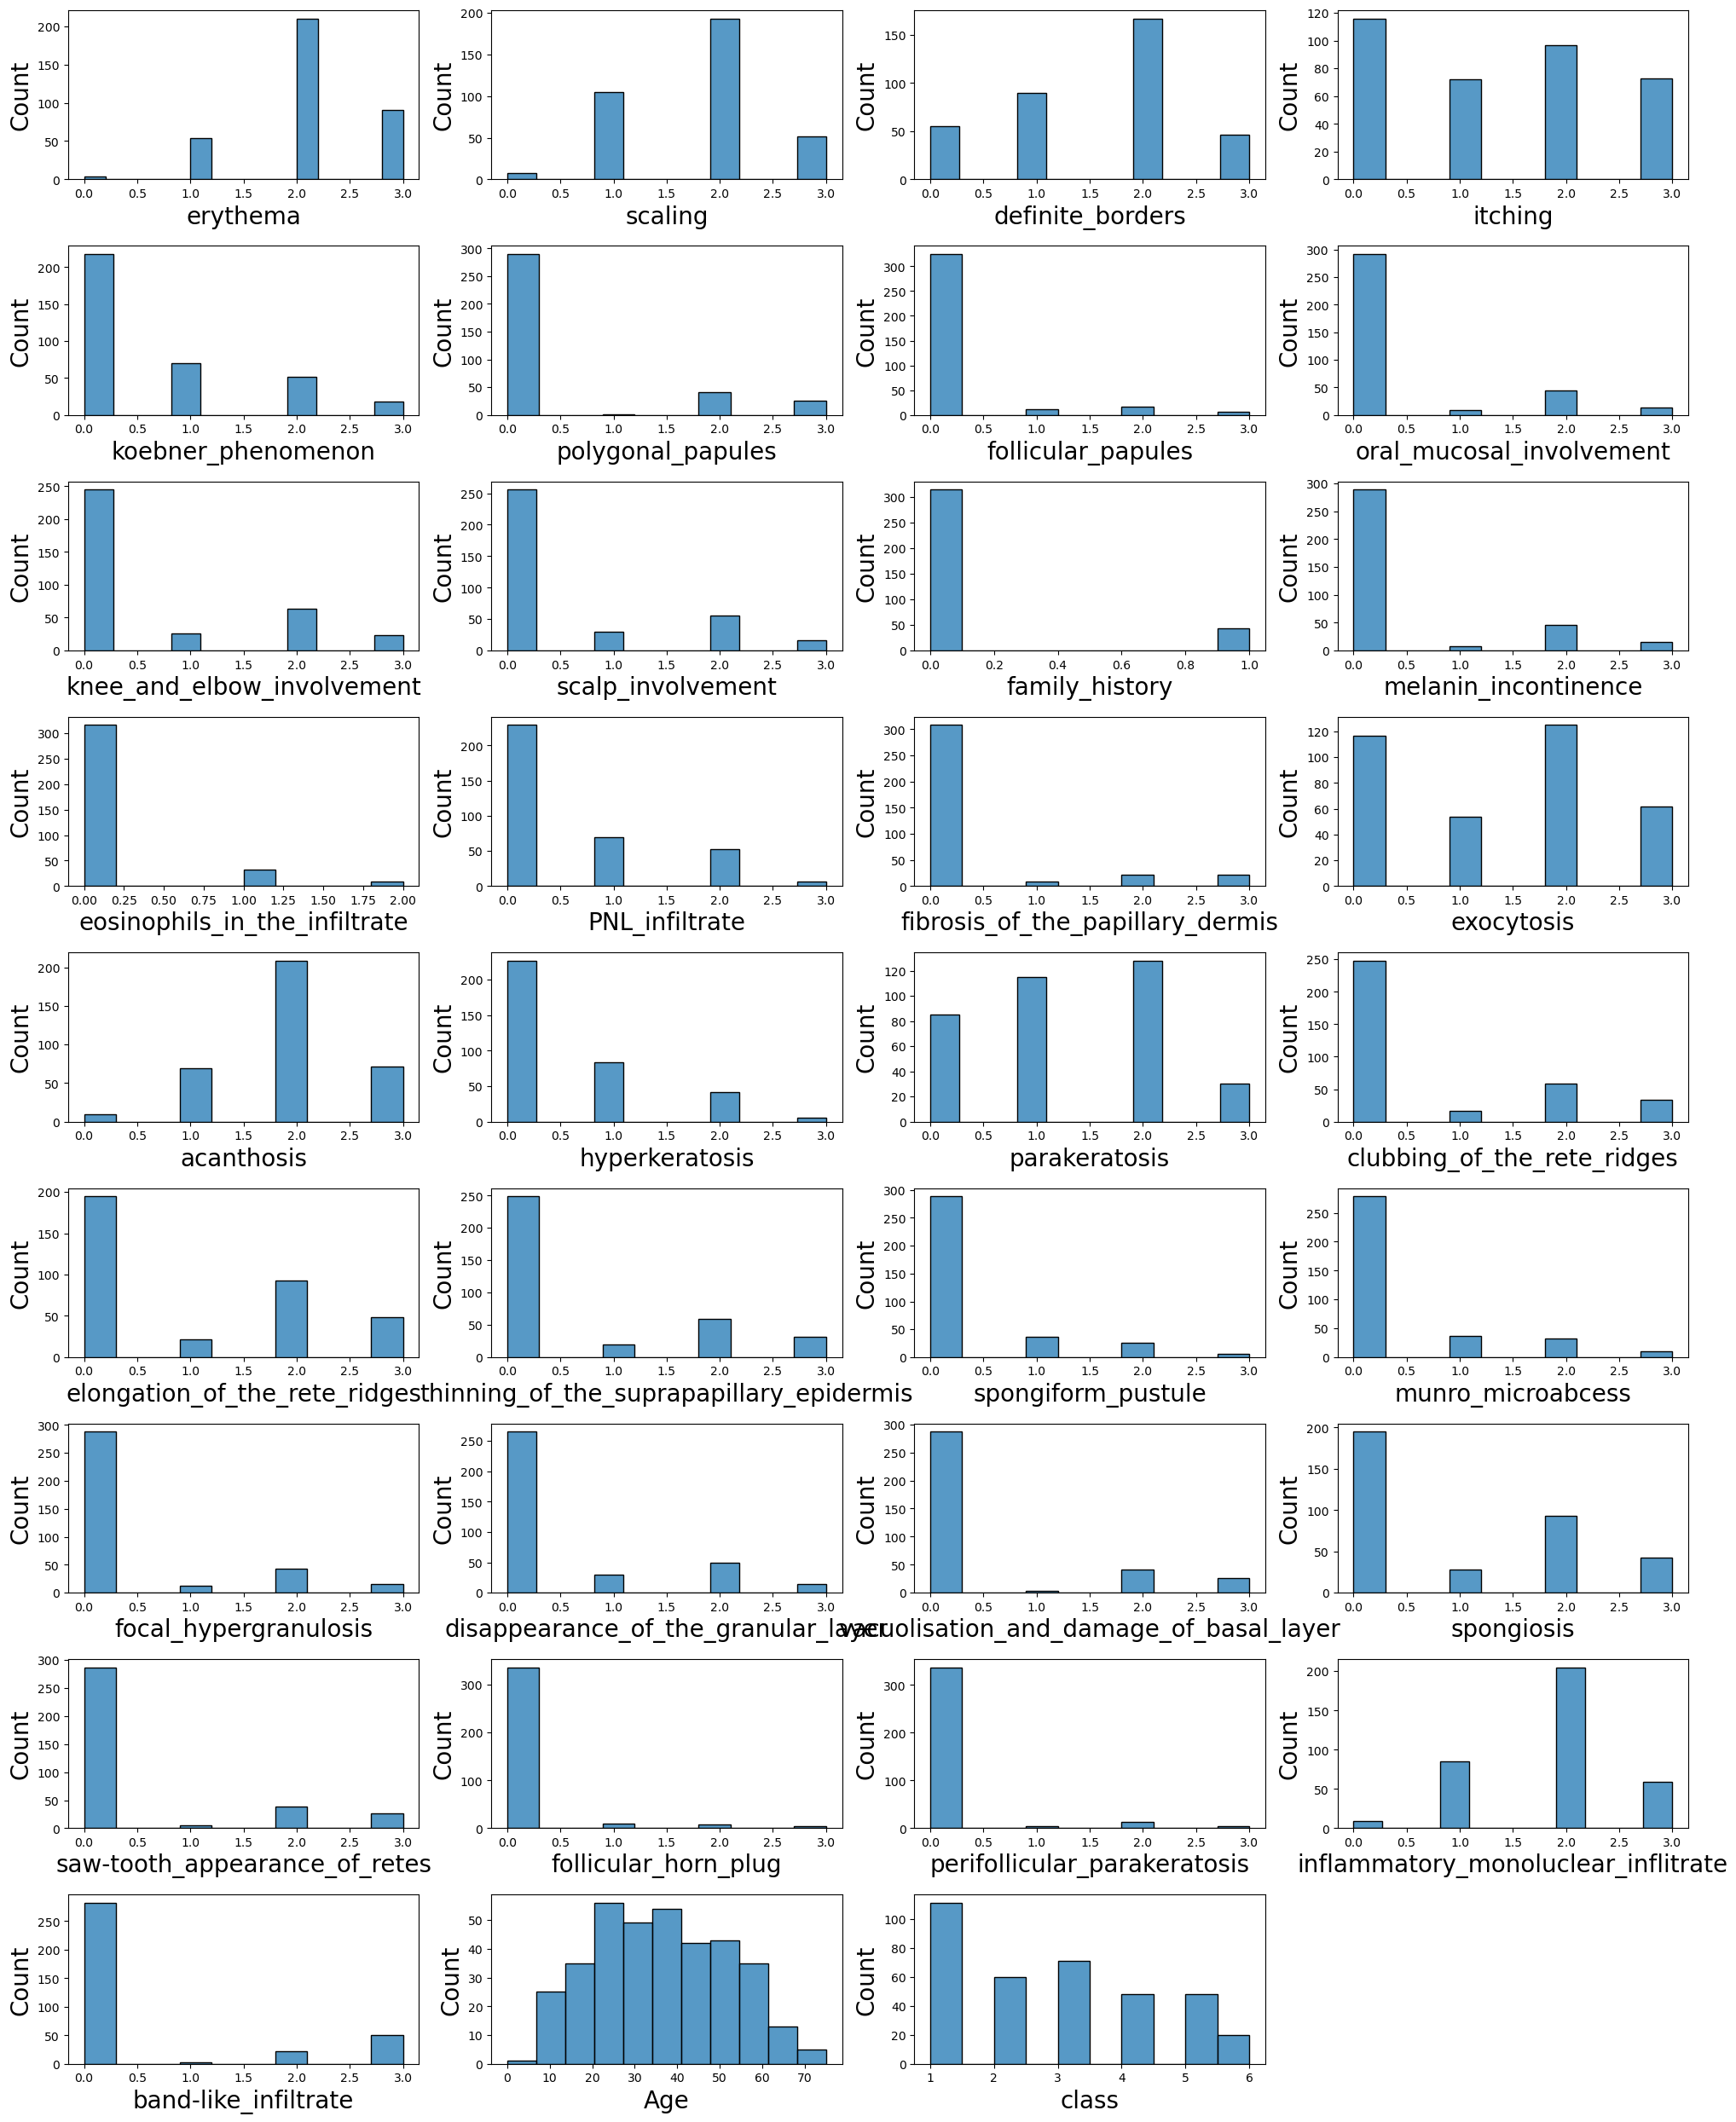

In [48]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in data:
    if plotnumber<=36:
        ax=plt.subplot(9,4,plotnumber)
        sns.histplot(data[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Count',fontsize=20)
    plotnumber+=1
plt.tight_layout()

# Insights
- patients have intermediate to high presence of the erythema & scaling symptoms.
- for clinical features, patients have 0 to 3 values in definite_borders & itching features. This indicates that whether there's an absence or high presence of the feature, it is most likely the skin diseases symptoms.
- while the rest of the features in clinical features, majority of them showed absence of symptoms.
- Majority of the patients doesn't have any of the family members had been observed with the disease.
- for histopathological features, some of the attributes showed patience possesses all levels of presence of the feature, while most of them showed absence of the feature.
- patience age range from infants to 75 years old.
- class classification:
    1) psoriasis
    2) seboreic dermatitis
    3) lichen planus
    4) pityriasis rosea
    5) cronic dermatitis
    6) pityriasis rubra pilaris


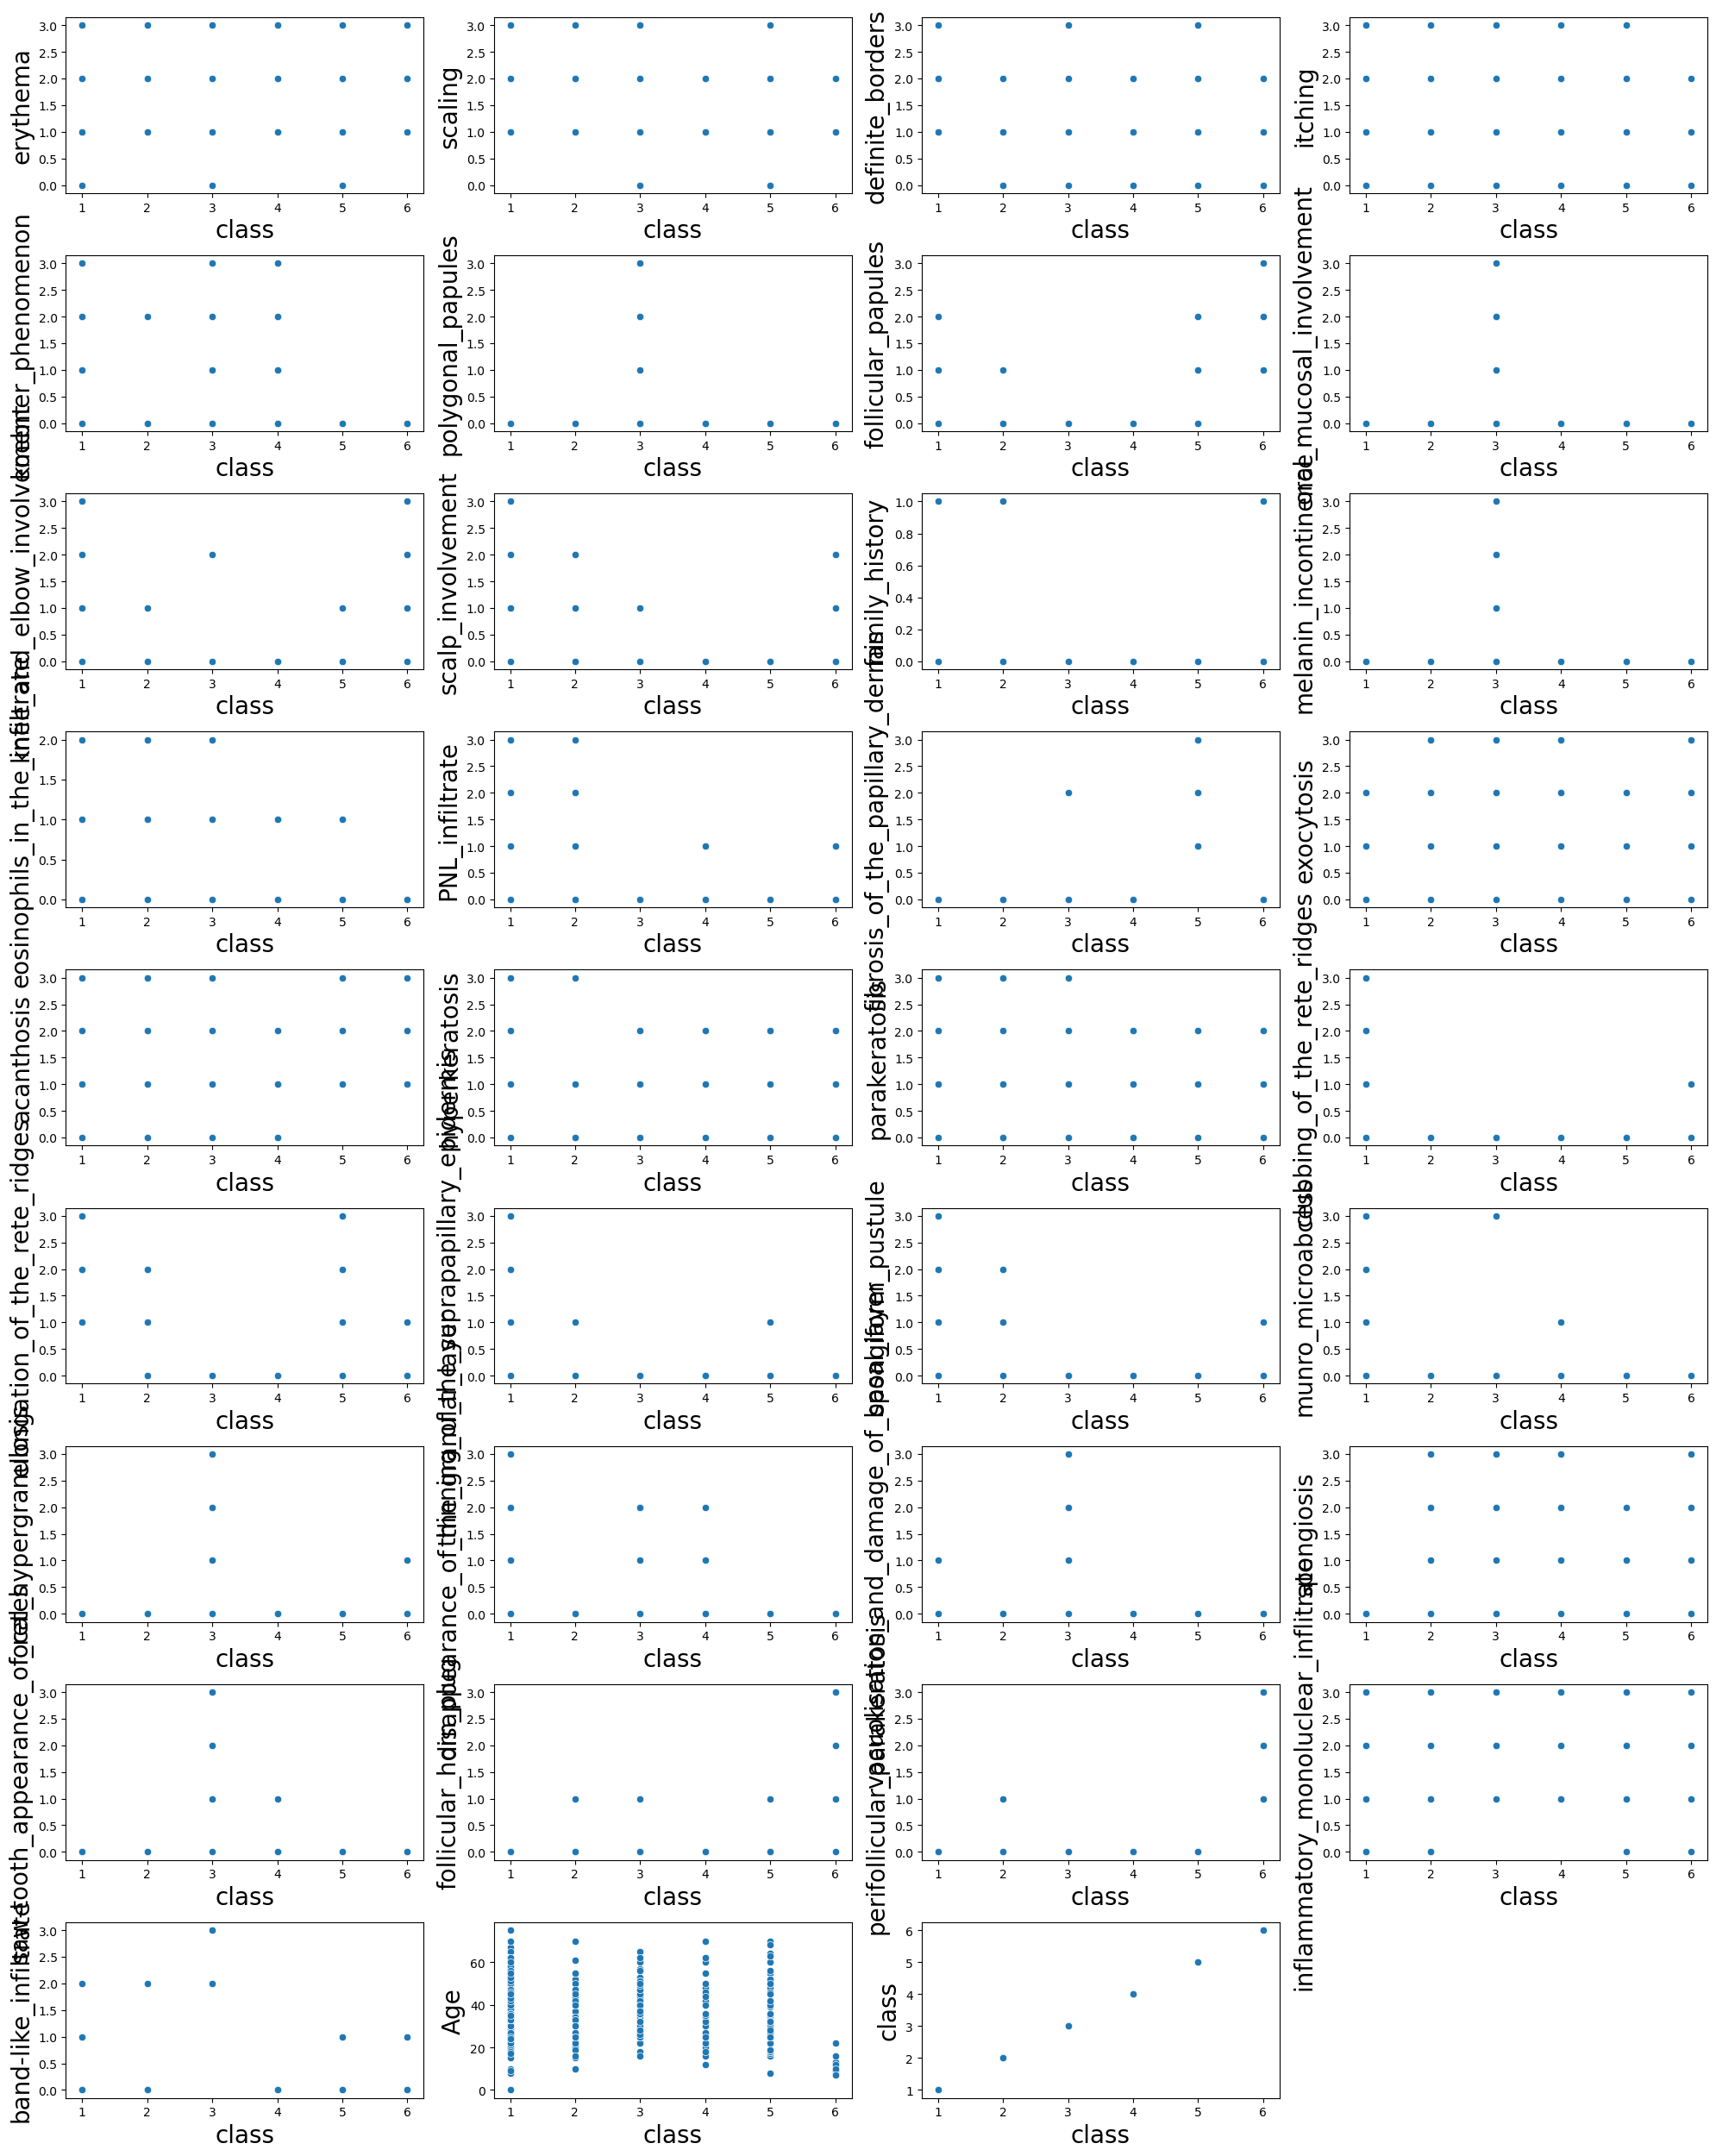

In [18]:
#Bivariate analysis with the target feature.
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in data:
    if plotnumber<=36:
        ax=plt.subplot(9,4,plotnumber)
        sns.scatterplot(x=data['class'],y=data[column])
        plt.xlabel('class',fontsize=20)
        plt.ylabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

# Insights
- showed the symptoms present in each diseases represented by the class.
- most of the features eg: erythema, scaling, definite_borders, itching, exocytosis, acanthosis, hyperkeratosis, parakerotosis, spongiosis, inflammatory_monoluclear_infiltrate showed that all the levels of presence (0 to 3) contributes as the symptoms of each of the disease.
- psoriasis, seboreic dermatitis and pityriasis rubra pilaris showed that previous family history could contribute to the symptoms of those diseases.

In [19]:
corr = data.corr()
corr

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,family_history,melanin_incontinence,eosinophils_in_the_infiltrate,PNL_infiltrate,fibrosis_of_the_papillary_dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing_of_the_rete_ridges,elongation_of_the_rete_ridges,thinning_of_the_suprapapillary_epidermis,spongiform_pustule,munro_microabcess,focal_hypergranulosis,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
erythema,1.000000,0.428769,0.248062,-0.033157,-0.008496,0.028225,-0.115275,-0.033391,0.138519,0.180740,0.173740,0.036039,0.071033,0.220784,-0.334604,0.025297,0.085688,-0.040812,0.214551,0.164601,0.023508,0.162065,0.172272,0.108256,-0.020583,0.153229,-0.003972,0.038837,-0.012408,-0.008997,0.006100,0.093026,-0.013850,-0.005028,-0.324846
scaling,0.428769,1.000000,0.347106,-0.072191,-0.009033,-0.075013,-0.098665,-0.084815,0.294258,0.295932,0.187995,-0.080428,0.036771,0.273509,-0.371937,-0.106149,0.124884,0.033167,0.306889,0.326104,0.154432,0.323718,0.299116,0.179588,-0.090620,0.205046,-0.113133,0.023095,-0.118109,-0.014702,-0.015402,-0.008453,-0.134966,0.016006,-0.458499
definite_borders,0.248062,0.347106,1.000000,-0.058534,0.239778,0.322657,-0.176715,0.280341,0.301187,0.261495,0.112793,0.305693,-0.142520,0.035561,-0.252761,-0.210341,0.213508,0.072985,0.368681,0.398286,0.226386,0.367492,0.248590,0.238679,0.285024,0.350007,0.291443,-0.252643,0.267409,-0.093264,-0.131788,0.124812,0.275099,0.138493,-0.381456
itching,-0.033157,-0.072191,-0.058534,1.000000,0.280039,0.412525,-0.144027,0.361761,-0.296824,-0.152562,-0.139675,0.365353,0.100339,-0.137993,0.184312,0.213461,0.058731,-0.019349,-0.079079,-0.235030,-0.138078,-0.236290,-0.156881,-0.047784,0.369593,-0.190548,0.371404,0.003028,0.380075,-0.176096,-0.184385,0.051553,0.389887,0.048053,0.039744
koebner_phenomenon,-0.008496,-0.009033,0.239778,0.280039,1.000000,0.388233,-0.175676,0.387937,-0.065438,0.013496,-0.093964,0.384412,-0.048038,-0.165916,-0.237857,0.141208,-0.038757,0.010014,-0.038782,0.017606,-0.152020,0.028212,-0.000663,0.160752,0.399235,0.002588,0.372236,0.006726,0.377539,-0.150348,-0.166956,0.110295,0.377323,0.081162,-0.089586
polygonal_papules,0.028225,-0.075013,0.322657,0.412525,0.388233,1.000000,-0.139384,0.863269,-0.278843,-0.258231,-0.176255,0.911177,0.028623,-0.317031,-0.151269,0.380972,0.147099,-0.164093,-0.048675,-0.294115,-0.399858,-0.291233,-0.208546,-0.204090,0.884553,-0.122467,0.911598,0.091031,0.894775,-0.097084,-0.112007,0.258753,0.904112,0.096953,0.064451
follicular_papules,-0.115275,-0.098665,-0.176715,-0.144027,-0.175676,-0.139384,1.000000,-0.134484,0.220849,-0.007320,0.199582,-0.138781,-0.089868,-0.121734,0.027821,-0.010890,-0.098995,0.198391,-0.029260,-0.116229,-0.104694,-0.131709,-0.059200,-0.098317,-0.121232,-0.161487,-0.142335,-0.012624,-0.141489,0.784991,0.844721,-0.093833,-0.136311,-0.371368,0.488708
oral_mucosal_involvement,-0.033391,-0.084815,0.280341,0.361761,0.387937,0.863269,-0.134484,1.000000,-0.286160,-0.264638,-0.170058,0.870142,0.013077,-0.305885,-0.132867,0.360589,0.114945,-0.152957,-0.044011,-0.283775,-0.385800,-0.280994,-0.201214,-0.192845,0.885306,-0.109676,0.886238,0.129879,0.873730,-0.084040,-0.108070,0.276068,0.890685,0.111047,0.062185
knee_and_elbow_involvement,0.138519,0.294258,0.301187,-0.296824,-0.065438,-0.278843,0.220849,-0.286160,1.000000,0.659286,0.349222,-0.275952,-0.202487,0.333183,-0.229941,-0.532277,0.116932,0.239834,0.444443,0.725942,0.504374,0.643784,0.449353,0.516330,-0.271063,0.480594,-0.285184,-0.417851,-0.283383,0.231977,0.256811,-0.079246,-0.279753,-0.078267,-0.382276
scalp_involvement,0.180740,0.295932,0.261495,-0.152562,0.013496,-0.258231,-0.007320,-0.264638,0.659286,1.000000,0.304867,-0.262591,-0.081709

<AxesSubplot:>

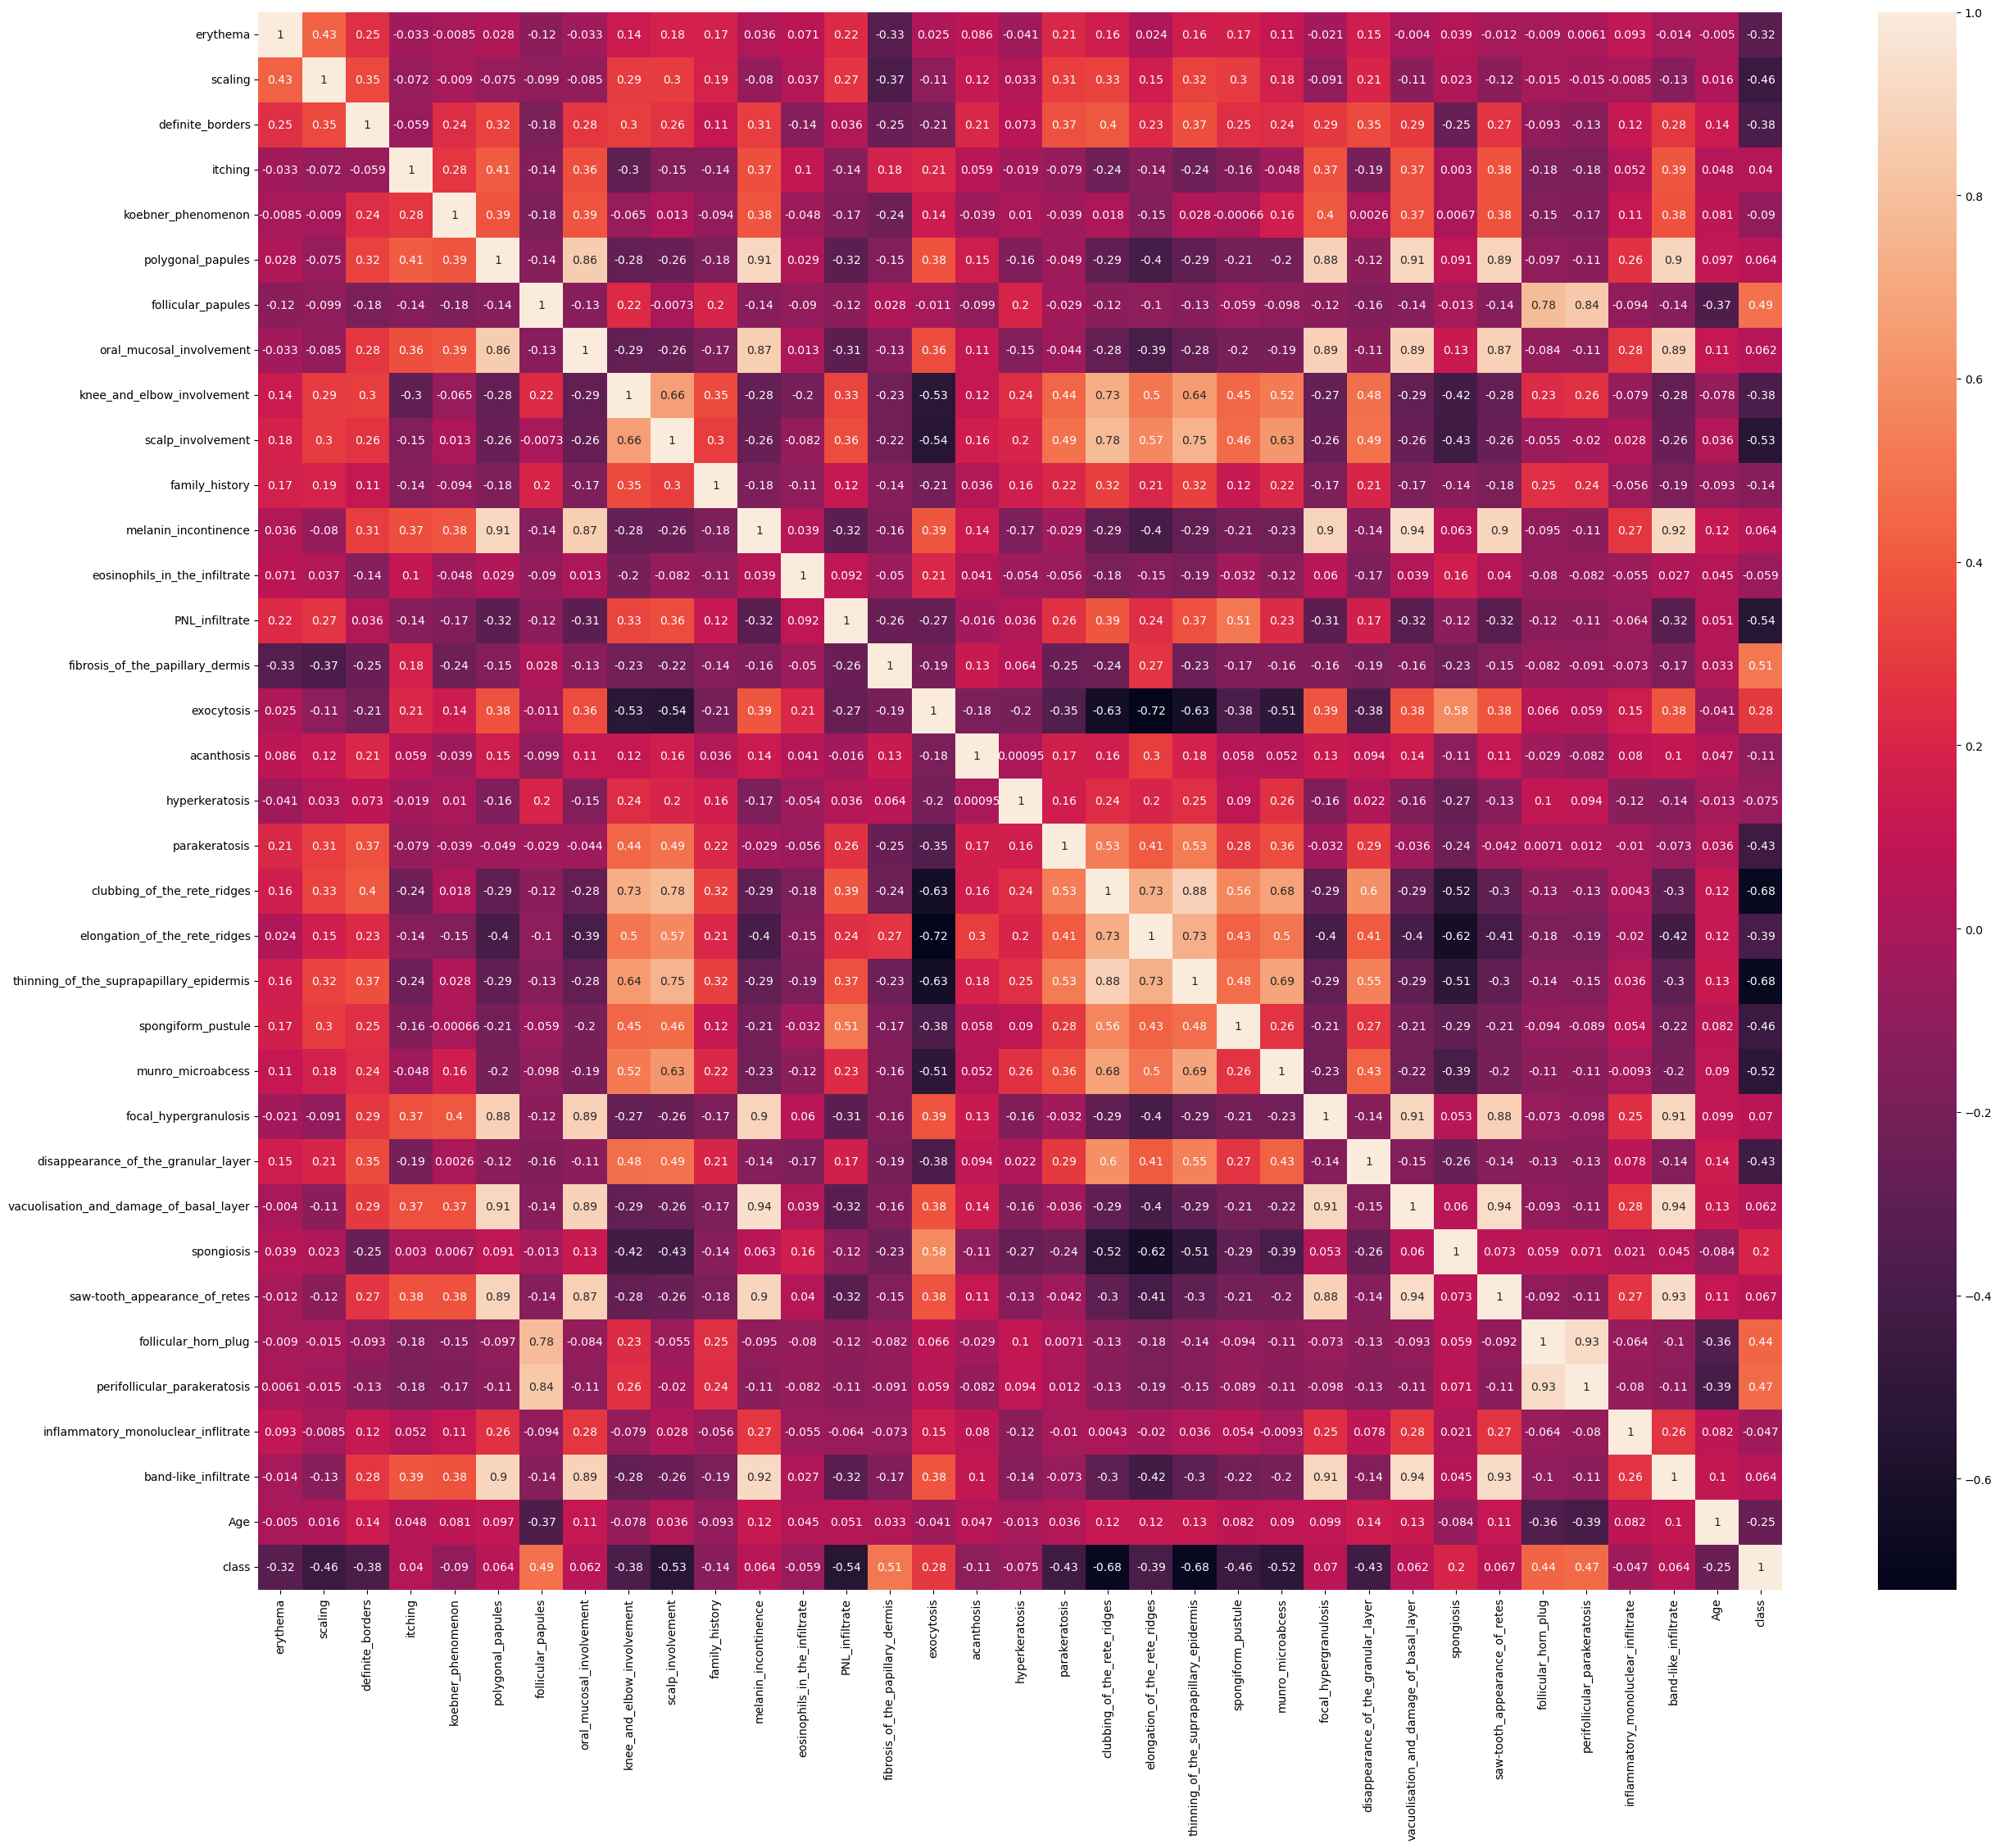

In [20]:
#heatmap
plt.figure(figsize=(30, 25))
sns.heatmap(data.corr(),annot=True)

# Task 2: Model Creation

In [49]:
X = data.iloc[:,:-1]
y = data['class']

In [50]:
y.value_counts()

1    111
3     71
2     60
5     48
4     48
6     20
Name: class, dtype: int64

In [51]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=110)

In [52]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(250, 34)
(108, 34)
(250,)
(108,)


# Lofistic Regression

In [53]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)

y_pred=lr.predict(X_test)

In [54]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score, precision_score,classification_report,f1_score

results = {}

results['Logistic Regression'] = [accuracy_score(y_test, y_pred),
                                  precision_score(y_test, y_pred, average='weighted'),
                                  recall_score(y_test, y_pred, average='weighted'),
                                  f1_score(y_test, y_pred, average='weighted')]

In [70]:
results['Logistic Regression']

[0.9722222222222222,
 0.9724867724867724,
 0.9722222222222222,
 0.9720994203752825]

In [27]:
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        37
           2       0.90      0.95      0.92        19
           3       1.00      1.00      1.00        19
           4       0.93      0.87      0.90        15
           5       1.00      1.00      1.00        13
           6       1.00      1.00      1.00         5

    accuracy                           0.97       108
   macro avg       0.97      0.97      0.97       108
weighted avg       0.97      0.97      0.97       108



# K-Nearest Neighbors (KNN)

In [55]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(3)
knn.fit(X_train, y_train)

y_pred1=knn.predict(X_test)

In [56]:
results['KNN'] = [accuracy_score(y_test, y_pred1),
                                  precision_score(y_test, y_pred1, average='weighted'),
                                  recall_score(y_test, y_pred1, average='weighted'),
                                  f1_score(y_test, y_pred1, average='weighted')]

In [57]:
results['KNN']

[0.8611111111111112, 0.869075176366843, 0.8611111111111112, 0.8639883077554507]

# Gaussian Naive Bayes (GaussianNB)

In [58]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

y_pred2=nb.predict(X_test)

In [59]:
results['Gaussian NB'] = [accuracy_score(y_test, y_pred2),
                                  precision_score(y_test, y_pred2, average='weighted'),
                                  recall_score(y_test, y_pred2, average='weighted'),
                                  f1_score(y_test, y_pred2, average='weighted')]

In [60]:
results['Gaussian NB']

[0.8240740740740741,
 0.8269316730523627,
 0.8240740740740741,
 0.7984971145321222]

# Support Vector Machines (SVM)

In [61]:
from sklearn.svm import SVC
svc = SVC() 
svc.fit(X_train, y_train)

y_pred3 = svc.predict(X_test)

In [62]:
results['Support Vector Machine'] = [accuracy_score(y_test, y_pred3),
                                  precision_score(y_test, y_pred3, average='weighted'),
                                  recall_score(y_test, y_pred3, average='weighted'),
                                  f1_score(y_test, y_pred3, average='weighted')]

In [63]:
results['Support Vector Machine']

[0.6851851851851852,
 0.5420595198372976,
 0.6851851851851852,
 0.5977034671140363]

# Decision Tree

In [65]:
from sklearn.tree import DecisionTreeClassifier  
dt= DecisionTreeClassifier()                      
dt.fit(X_train,y_train)  

y_pred4 = dt.predict(X_test)

In [66]:
results['Decision Tree'] = [accuracy_score(y_test, y_pred4),
                                  precision_score(y_test, y_pred4, average='weighted'),
                                  recall_score(y_test, y_pred4, average='weighted'),
                                  f1_score(y_test, y_pred4, average='weighted')]

In [67]:
results['Decision Tree']

[0.9537037037037037,
 0.9570601851851852,
 0.9537037037037037,
 0.9530374918502773]

# Random Forest

In [68]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

y_pred5 = rf.predict(X_test)

In [69]:
results['Random Forest'] = [accuracy_score(y_test, y_pred5),
                                  precision_score(y_test, y_pred5, average='weighted'),
                                  recall_score(y_test, y_pred5, average='weighted'),
                                  f1_score(y_test, y_pred5, average='weighted')]

In [71]:
results['Random Forest']

[0.9814814814814815,
 0.9814814814814815,
 0.9814814814814815,
 0.9814814814814815]

# Comparison of models

In [38]:
# Create a DataFrame from the results
data_results = pd.DataFrame.from_dict(results, orient='index', columns=['Accuracy', 'Precision', 'Recall', 'F1-Score'])

data_results

,Accuracy,Precision,Recall,F1-Score
Logistic Regression,0.972222,0.972487,0.972222,0.972099
KNN,0.861111,0.869075,0.861111,0.863988
Gaussian NB,0.824074,0.826932,0.824074,0.798497
Support Vector Machine,0.685185,0.542060,0.685185,0.597703
Decision Tree,0.953704,0.957060,0.953704,0.953037
Random Forest,0.981481,0.981481,0.981481,0.981481


Among the models, the Random Forest model demonstrates the highest accuracy & F1 score of 0.981481. Decision Tree & Logistic Regression also achieve a comparable high accuracy and F1 score. 

In [39]:
#classification report of Random Forest model
cr = classification_report(y_test, y_pred5)
print(cr)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        37
           2       0.95      0.95      0.95        19
           3       1.00      1.00      1.00        19
           4       0.93      0.93      0.93        15
           5       1.00      1.00      1.00        13
           6       1.00      1.00      1.00         5

    accuracy                           0.98       108
   macro avg       0.98      0.98      0.98       108
weighted avg       0.98      0.98      0.98       108



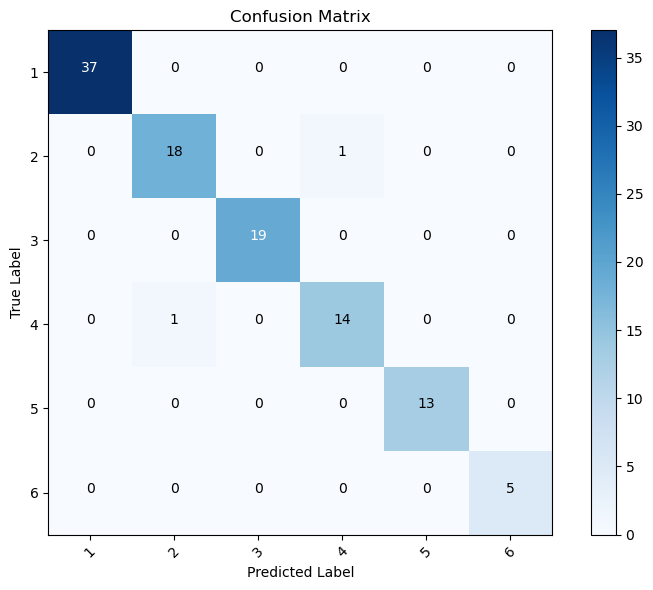

In [40]:
cm = confusion_matrix(y_test, y_pred5)

# Define class labels
classes = ['1', '2', '3', '4', '5', '6']

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Fill the cells of the confusion matrix with values
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()

# Conclusions

During this evaluation, we assess various metrics such as accuracy, precision, recall and F1 score. This comparative analysis allow us to determine the effectiveness and efficiency of different classifiers in predicting erythemato-squamous based on the provided dataset. By systematically evaluating the performance metrics of each classifier, we can gain insights into their strengths and weaknesses. This information will aid in selecting the most suitable classifier for our specific task of erythemato-squamous prediction. This process contribute to the selection of a robust and accurate model for predicting erythemato-squamous in the given dataset. From the results, it can be observed that Random Forest model demonstrates the highest accuracy & F1 score of 0.981481. It also correctly classify the diseases with only 2 missclassifications. Hence, it can be concluded that Random Forest emerges as the preferred model for our dataset.

# Task 3

It's hard for the doctors to identify the skin diseases at earliest stage due to the need for the patients to consult the doctors first before being referred to the dermatologist. Prior to the dermatology clinic visit, most patients visit the doctors/health officers for the same complaints. A lack of dermatological training is an essential factor responsible for difﬁculties in diagnosing and managing skin diseases. Dermatological diseases are one of the most common diseases to present and yet this group of diseases is often overlooked in medical education and training. This can be accomplished by improving medical schools’ curricula and providing lectures and workshops on common local dermatological conditions by dermatologists. Additionally, doctors/health officers need to recognize the referral guidelines to avoid unnecessary referrals due to poor differentiation skills between benign and malignant skin conditions. This raises attention about the need for specialized training in such cases. Apart from that, they need to be trained to perform screening examinations for such dermatological conditions to reach an early diagnosis and intervention, which in turn reduces the morbidity and mortality of such skin disorders. 

# Challenges

1) Small data
- There are only 366 datas for this study hence it is difficult to accurately train and test the data.

2) Imbalanced data
- The outputs for this data is imbalanced making it very easy for the training data only consists of the majority class.

3) Underfitting of training data
- Since the data is small, data is unable to establish an accurate relationship between input and output variables. It signifies the data is too simple to establish a precise relationship.